# WIH2001 Case Study: Campus Recruitment
    Semester 2, 2021/2022
    By Siti Norhidayah Binti Abdul Bari Arbee (17206657)

In [1]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns 
import missingno as msno
%matplotlib inline

In [2]:
# Load dataset of campus recruitment from kaggle
dataset = pd.read_csv("Placement_data_Full_Class.csv")

In [3]:
# View top five rows of the dataset
dataset.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [4]:
# Know the size of the dataset
dimension = dataset.shape
print('Dimension of the dataset: ', dimension)

Dimension of the dataset:  (215, 15)


In [5]:
# Displaying the datatype of attributes in dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    object 
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    object 
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           215 non-null    object 
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    object 
 9   workex          215 non-null    object 
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    object 
 12  mba_p           215 non-null    float64
 13  status          215 non-null    object 
 14  salary          148 non-null    float64
dtypes: float64(6), int64(1), object(8)
memory usage: 25.3+ KB


In [6]:
# Display descriptive statistics for this dataset
dataset.describe()

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
count,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,148.000000
mean,108.000000,67.303395,66.333163,66.370186,72.100558,62.278186,288655.405405
std,62.209324,10.827205,10.897509,7.358743,13.275956,5.833385,93457.452420
min,1.000000,40.890000,37.000000,50.000000,50.000000,51.210000,200000.000000
25%,54.500000,60.600000,60.900000,61.000000,60.000000,57.945000,240000.000000
50%,108.000000,67.000000,65.000000,66.000000,71.000000,62.000000,265000.000000
75%,161.500000,75.700000,73.000000,72.000000,83.500000,66.255000,300000.000000
max,215.000000,89.400000,97.700000,91.000000,98.000000,77.890000,940000.000000


In [7]:
# Display the datatypes for each of the factors
dataset.dtypes

sl_no               int64
gender             object
ssc_p             float64
ssc_b              object
hsc_p             float64
hsc_b              object
hsc_s              object
degree_p          float64
degree_t           object
workex             object
etest_p           float64
specialisation     object
mba_p             float64
status             object
salary            float64
dtype: object

<AxesSubplot:>

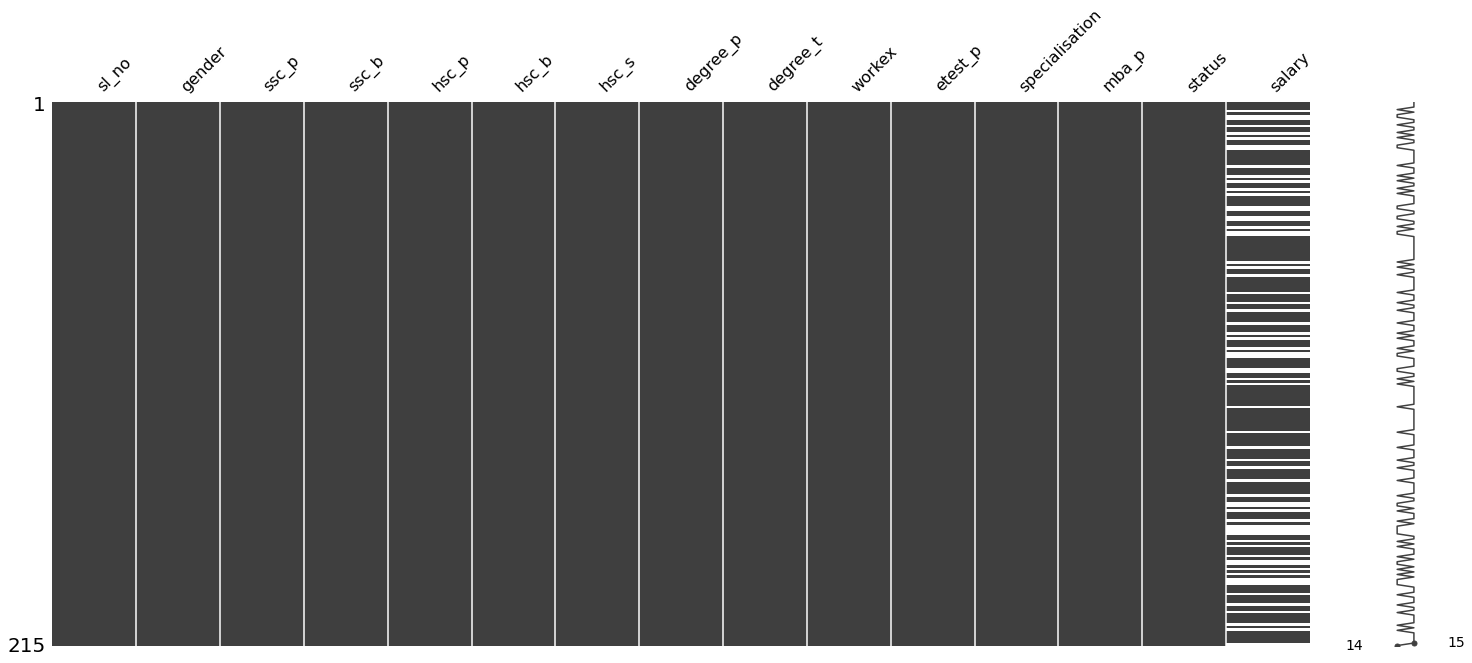

In [8]:
# Check the dataset if there are any NULL values
msno.matrix(dataset)

In [9]:
# To have a clear number of the NULL values in salary
print('Factors (columns) with null values:',dataset.isnull().sum(), sep = '\n')

Factors (columns) with null values:
sl_no              0
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64


In [10]:
# We replace NULL values in salary with '0'
dataset['salary'].fillna(value=0, inplace=True)
# View the update of NULL values after we replace with 0
print('Salary column with null values:',dataset['salary'].isnull().sum(), sep = '\n')

Salary column with null values:
0


In [11]:
# We drop unwanted columns from the dataset and create a another copy of the dataset named placement
placement = dataset

# Drop the 'sl_no', 'ssc_b' and 'hsc_b' column
placement.drop(['sl_no','ssc_b','hsc_b'], axis = 1,inplace=True) 

# Display top 5 updated dataset
placement.head()

,gender,ssc_p,hsc_p,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,M,67.00,91.00,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,M,79.33,78.33,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,M,65.00,68.00,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,M,56.00,52.00,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,0.0
4,M,85.80,73.60,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


Text(0.5, 1.0, 'Employability percentage')

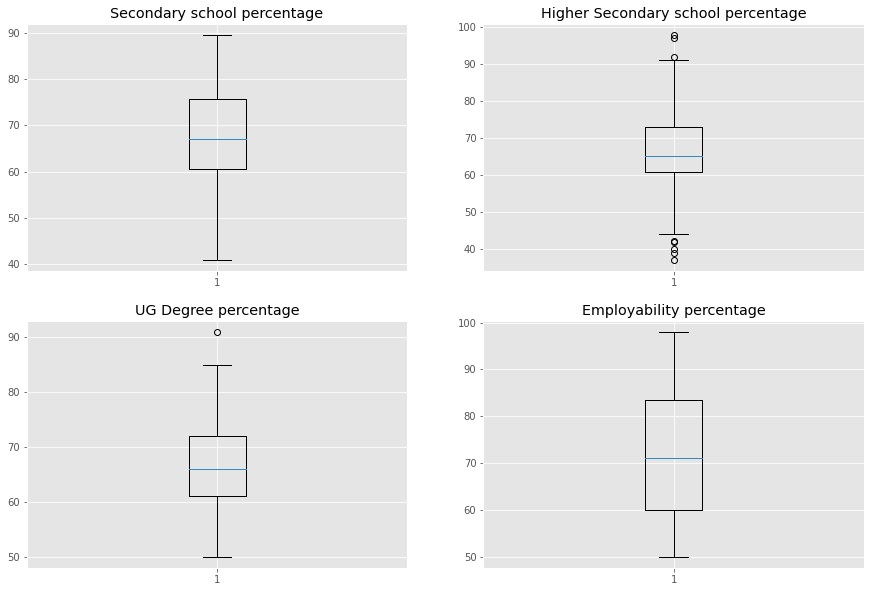

In [12]:
# Generate boxplot for 'ssc_p', 'hsc_p' , 'degree_p' and 'etest_p'
# To view existing outliers

# setting the frame size
plt.figure(figsize = (15, 10))
plt.style.use('ggplot')
ax=plt.subplot(221)

plt.boxplot(placement['ssc_p'])
ax.set_title('Secondary school percentage')
ax=plt.subplot(222)
plt.boxplot(placement['hsc_p'])
ax.set_title('Higher Secondary school percentage')
ax=plt.subplot(223)
plt.boxplot(placement['degree_p'])
ax.set_title('UG Degree percentage')
ax=plt.subplot(224)
plt.boxplot(placement['etest_p'])
ax.set_title('Employability percentage')

In [13]:
# Remove outliers in 'hsc_p'

# Retrieve value of Q1 and Q3
Q1 = placement['hsc_p'].quantile(0.25)
Q3 = placement['hsc_p'].quantile(0.75)
# Calculate the interquartile range (IQR)
IQR = Q3 - Q1   

# We clean the dataset by filtering 
filter = (placement['hsc_p'] >= Q1 - 1.5 * IQR) & (placement['hsc_p'] <= Q3 + 1.5 *IQR)
# Assign cleaned dataset into 'placement_cleaned'
placement_cleaned=placement.loc[filter]

Text(0.5, 1.0, 'After (hsc_p)')

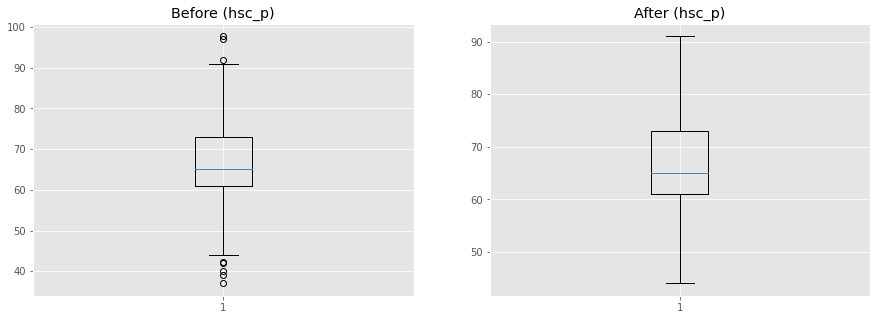

In [14]:
# Compare before and after removing outliers from 'hsc_p'
# Set the frame
plt.figure(figsize = (15, 5))
plt.style.use('ggplot')
ax=plt.subplot(121)
# Before removing outliers
plt.boxplot(placement['hsc_p'])
ax.set_title('Before (hsc_p)')
ax=plt.subplot(122)
# After removing outliers
plt.boxplot(placement_cleaned['hsc_p'])
ax.set_title('After (hsc_p)')

<AxesSubplot:xlabel='status', ylabel='count'>

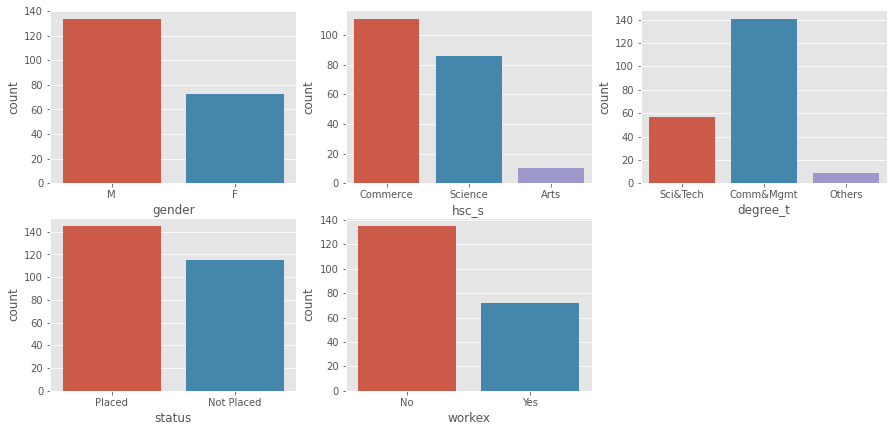

In [15]:
# Visualizing the categorical features

# Set the frame size
plt.figure(figsize = (15, 7))
plt.style.use('ggplot') 

#Gender
plt.subplot(231)
sns.countplot(x="gender", data=placement_cleaned)

# Higher Secondary Specialization
plt.subplot(232)
sns.countplot(x="hsc_s", data=placement_cleaned)

# Type of Degree
plt.subplot(233)
sns.countplot(x="degree_t", data=placement_cleaned)

# Work Specialization
plt.subplot(234)
sns.countplot(x="specialisation", data=placement_cleaned)

# Work Experience
plt.subplot(235)
sns.countplot(x="workex", data=placement_cleaned)

# Status of recruitment
plt.subplot(234)
sns.countplot(x="status", data=placement_cleaned)

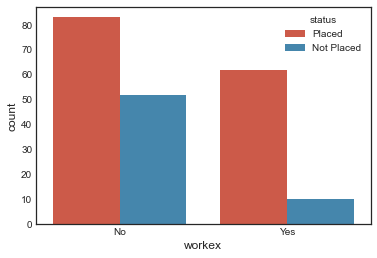

In [16]:
# Visualizing Work Experience vs Status
plt.style.use('seaborn-white')
sns.countplot(x = 'workex',hue = "status",data = placement_cleaned)
#ax[1].set_title('Influence of work experience on placement')
plt.show()

In [17]:
# Correlation between degree percentage and employability rate
# import library
import plotly_express as px
gapminder=px.data.gapminder()
px.scatter(placement_cleaned,x="degree_p",y="etest_p",color="status",facet_col="workex")

In [18]:
# Gender bias when offering Salary
# Creating Violin plot
px.violin(placement_cleaned,y="salary",x="specialisation",color="gender",box=True,points="all")

In [19]:
# Perform T-test

# Extracting observation
placed_degree = placement_cleaned[placement_cleaned['status'] == 'Placed']['ssc_p']
notplaced_degree = placement_cleaned[placement_cleaned['status'] == 'Not Placed']['ssc_p']

# Comparing Mean
# We calculate the mean degree of both status
# to see if it is different or not.

p_degree = placed_degree.mean()
np_degree = notplaced_degree.mean()

print("Mean of p_degree: ", p_degree)
print("Mean of np_degree: ", np_degree)


Mean of p_degree:  71.64027586206896
Mean of np_degree:  58.024032258064516


In [20]:
import scipy.stats as stats
# Finding area under the curve
cutOffPoint = 70
print(1-(stats.norm(62.278186, 5.833385).cdf(70)))

0.09279672805268724


In [85]:
# Perform hypothesis testing
# Importing the norm function from the scipy.stats module
from scipy.stats import norm
# Finding the probability of getting a value that is 0.56 standard deviation from mean using norm.cdf() function
print(norm.cdf(0.56))
output:- 0.712

0.712260281150973


## Data Pre-processing

In [19]:
# Data Preprocessing
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder

# Make copy to avoid changing original data 
object_cols=['gender','workex','specialisation','status']

# Apply label encoder to each column with categorical data
label_encoder = LabelEncoder()
for col in object_cols:
    placement_cleaned[col] = label_encoder.fit_transform(placement_cleaned[col])
placement_cleaned.head()

,gender,ssc_p,hsc_p,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,67.00,91.00,Commerce,58.00,Sci&Tech,0,55.0,1,58.80,1,270000.0
1,1,79.33,78.33,Science,77.48,Sci&Tech,1,86.5,0,66.28,1,200000.0
2,1,65.00,68.00,Arts,64.00,Comm&Mgmt,0,75.0,0,57.80,1,250000.0
3,1,56.00,52.00,Science,52.00,Sci&Tech,0,66.0,1,59.43,0,0.0
4,1,85.80,73.60,Commerce,73.30,Comm&Mgmt,0,96.8,0,55.50,1,425000.0


In [20]:
# Use dummies for category with more than two classes
# dummy for 'hsc_s' and 'degree_t'
hsc_s_dummy=pd.get_dummies(placement_cleaned['hsc_s'], prefix='dummy')
degree_t_dummy=pd.get_dummies(placement_cleaned['degree_t'], prefix='dummy')

# encoded dataset
placement_coded = pd.concat([placement_cleaned,hsc_s_dummy,degree_t_dummy],axis=1)
placement_coded.drop(['hsc_s','degree_t','salary'],axis=1, inplace=True)
placement_coded.head()

,gender,ssc_p,hsc_p,degree_p,workex,etest_p,specialisation,mba_p,status,dummy_Arts,dummy_Commerce,dummy_Science,dummy_Comm&Mgmt,dummy_Others,dummy_Sci&Tech
0,1,67.00,91.00,58.00,0,55.0,1,58.80,1,0,1,0,0,0,1
1,1,79.33,78.33,77.48,1,86.5,0,66.28,1,0,0,1,0,0,1
2,1,65.00,68.00,64.00,0,75.0,0,57.80,1,1,0,0,1,0,0
3,1,56.00,52.00,52.00,0,66.0,1,59.43,0,0,0,1,0,0,1
4,1,85.80,73.60,73.30,0,96.8,0,55.50,1,0,1,0,1,0,0


In [21]:
# Assign new dataframe with the dummies
coded_features=['gender','ssc_p','hsc_p','hsc_p','workex','etest_p','specialisation','mba_p',
              'dummy_Arts','dummy_Commerce','dummy_Science','dummy_Comm&Mgmt','dummy_Others','dummy_Sci&Tech']
# View the number of cols
print("Total columns: ",len(coded_features))

Total columns:  14


In [22]:
X=placement_coded.drop(['status'],axis=1)
y=placement_coded.status

In [23]:
# Train and Split the Data
# import library
from sklearn.model_selection import train_test_split

# Assign X_train, X_test, y_train, y_test
X_train, X_test, y_train, y_test = train_test_split(X, y,train_size=0.8,random_state=1)

print("Input Training:",X_train.shape)
print("Input Test:",X_test.shape)
print("Output Training:",y_train.shape)
print("Output Test:",y_test.shape)

Input Training: (165, 14)
Input Test: (42, 14)
Output Training: (165,)
Output Test: (42,)


## Implementing Machine Learning Models

In [27]:
# Import libraries
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
plt.style.use('ggplot')

In [28]:
# Loading models
models = []
models.append(('LR', LogisticRegression()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('RT', RandomForestClassifier()))

In [48]:
# Evaluating the model
seed = 150
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, shuffle = True, random_state=seed)
    cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.861397 (0.091971)
CART: 0.775000 (0.090710)
RT: 0.848897 (0.047409)


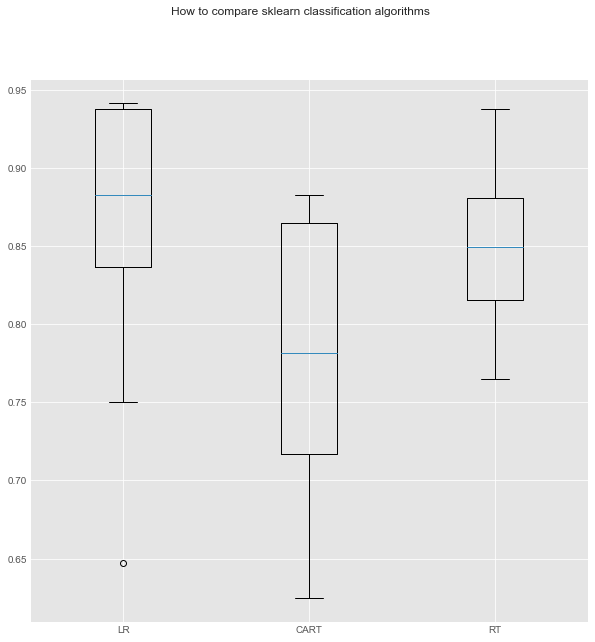

In [49]:
# Plotting Boxplot
fig = plt.figure(figsize=(10,10))
fig.suptitle('How to compare sklearn classification algorithms')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()